## Import Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Unigrams

### Create Document-Term Matrices

In [2]:
msft_earnings_dict_cleaned = pickle.load(open('cleaned_corpus.pickle', 'rb'))

In [3]:
msft_earnings_dict_ordered = {}

for tscript in sorted(msft_earnings_dict_cleaned):
    msft_earnings_dict_ordered[tscript] = msft_earnings_dict_cleaned[tscript]

In [4]:
ballmer_dict = dict(list(msft_earnings_dict_ordered.items())[:len(msft_earnings_dict_ordered)//2]) 
nadella_dict = dict(list(msft_earnings_dict_ordered.items())[len(msft_earnings_dict_ordered)//2:]) 

In [5]:
corpus_msft = list(msft_earnings_dict_ordered.values())
corpus_ballmer = list(ballmer_dict.values())
corpus_nadella = list(nadella_dict.values())

In [6]:
import pickle

with open('cleaned_corpus_msft.pickle', 'wb') as f_msft:
    pickle.dump(corpus_msft, f_msft)

with open('cleaned_corpus_ball.pickle', 'wb') as f_ball:
    pickle.dump(corpus_ballmer, f_ball)

with open('cleaned_corpus_nad.pickle', 'wb') as f_nad:
    pickle.dump(corpus_nadella, f_nad)

#### Count vectorizer

In [7]:
cv_msft = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.5)
X_msft = cv_msft.fit_transform(corpus_msft).toarray()

cv_ballmer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_ballmer = cv_ballmer.fit_transform(corpus_ballmer).toarray()

cv_nadella = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2)
X_nadella = cv_nadella.fit_transform(corpus_nadella).toarray()

In [8]:
df_msft = pd.DataFrame(X_msft, columns=cv_msft.get_feature_names())
df_ballmer = pd.DataFrame(X_ballmer, columns=cv_ballmer.get_feature_names())
df_nadella = pd.DataFrame(X_nadella, columns=cv_nadella.get_feature_names())

In [9]:
# Total corpus

In [10]:
sum_words_msft = X_msft.sum(axis=0)
words_freq_msft = [(word, sum_words_msft[idx]) for word, idx in cv_msft.vocabulary_.items()]
words_freq_msft = sorted(words_freq_msft, key = lambda x:x[1], reverse=True)

In [11]:
words_freq_msft

[('linkedin', 315),
 ('ai', 215),
 ('edge', 141),
 ('vista', 107),
 ('analytics', 106),
 ('yahoo', 103),
 ('transformation', 101),
 ('refresh', 91),
 ('saas', 91),
 ('skype', 89),
 ('iot', 88),
 ('learn', 84),
 ('github', 84),
 ('shipment', 82),
 ('stack', 80),
 ('paas', 80),
 ('forecast', 78),
 ('brad', 78),
 ('issue', 77),
 ('mobility', 76),
 ('layer', 74),
 ('capacity', 73),
 ('weakness', 73),
 ('engineering', 73),
 ('home', 70),
 ('transform', 70),
 ('connect', 70),
 ('economy', 69),
 ('database', 69),
 ('monthly', 69),
 ('worker', 69),
 ('raimo', 67),
 ('modern', 66),
 ('proposition', 65),
 ('condition', 64),
 ('empower', 64),
 ('supply', 63),
 ('buyback', 63),
 ('weak', 63),
 ('difficult', 62),
 ('opex', 62),
 ('inside', 62),
 ('tough', 62),
 ('compliance', 62),
 ('frankly', 62),
 ('volatility', 61),
 ('tablet', 61),
 ('associate', 60),
 ('rbc', 60),
 ('iaa', 60),
 ('skus', 59),
 ('asp', 59),
 ('barclays', 59),
 ('season', 58),
 ('installed', 58),
 ('voice', 57),
 ('easy', 57),
 

In [12]:
# Ballmer corpus

In [13]:
sum_words_ballmer = X_ballmer.sum(axis=0)
words_freq_ballmer = [(word, sum_words_ballmer[idx]) for word, idx in cv_ballmer.vocabulary_.items()]
words_freq_ballmer = sorted(words_freq_ballmer, key = lambda x:x[1], reverse=True)

In [14]:
words_freq_ballmer

[('product', 531),
 ('office', 440),
 ('service', 423),
 ('consumer', 407),
 ('customer', 393),
 ('impact', 386),
 ('reserve', 382),
 ('share', 374),
 ('rate', 353),
 ('cost', 353),
 ('enterprise', 349),
 ('term', 344),
 ('new', 343),
 ('guidance', 337),
 ('launch', 308),
 ('start', 302),
 ('high', 302),
 ('xbox', 283),
 ('drive', 281),
 ('sale', 273),
 ('device', 269),
 ('cloud', 269),
 ('online', 263),
 ('expense', 256),
 ('mix', 253),
 ('sort', 249),
 ('back', 242),
 ('operate', 236),
 ('time', 236),
 ('great', 230),
 ('margin', 225),
 ('provide', 220),
 ('company', 220),
 ('low', 214),
 ('number', 210),
 ('income', 209),
 ('remain', 208),
 ('unit', 200),
 ('expectation', 196),
 ('move', 195),
 ('full', 195),
 ('license', 195),
 ('segment', 194),
 ('obviously', 193),
 ('side', 190),
 ('people', 188),
 ('forward', 186),
 ('oem', 186),
 ('performance', 185),
 ('premium', 185),
 ('live', 183),
 ('tool', 182),
 ('hardware', 182),
 ('decline', 182),
 ('platform', 182),
 ('demand', 180),


In [15]:
# Nadella corpus

In [16]:
sum_words_nadella = X_nadella.sum(axis=0)
words_freq_nadella = [(word, sum_words_nadella[idx]) for word, idx in cv_nadella.vocabulary_.items()]
words_freq_nadella = sorted(words_freq_nadella, key = lambda x:x[1], reverse=True)

In [17]:
words_freq_nadella

[('cloud', 1458),
 ('azure', 1009),
 ('customer', 982),
 ('service', 902),
 ('commercial', 791),
 ('office', 770),
 ('new', 760),
 ('margin', 710),
 ('drive', 531),
 ('impact', 529),
 ('gross', 521),
 ('segment', 477),
 ('dynamic', 428),
 ('even', 412),
 ('data', 409),
 ('enterprise', 407),
 ('rate', 407),
 ('device', 405),
 ('reserve', 403),
 ('opportunity', 396),
 ('expense', 390),
 ('product', 386),
 ('mix', 375),
 ('time', 339),
 ('company', 336),
 ('value', 328),
 ('platform', 324),
 ('operate', 322),
 ('start', 321),
 ('executive', 320),
 ('build', 320),
 ('linkedin', 314),
 ('game', 313),
 ('base', 306),
 ('yearoveryear', 299),
 ('security', 298),
 ('sale', 295),
 ('high', 294),
 ('term', 288),
 ('help', 282),
 ('sort', 279),
 ('share', 271),
 ('decline', 269),
 ('application', 268),
 ('change', 265),
 ('team', 262),
 ('work', 258),
 ('consumer', 255),
 ('move', 251),
 ('need', 251),
 ('add', 247),
 ('investment', 245),
 ('demand', 244),
 ('income', 241),
 ('xbox', 239),
 ('ever

#### Tf-idf vectorizer

In [18]:
cv_tfidf_msft = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.5)
X_tfidf_msft = cv_tfidf_msft.fit_transform(corpus_msft).toarray()

cv_tfidf_ballmer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_tfidf_ballmer = cv_tfidf_ballmer.fit_transform(corpus_ballmer).toarray()

cv_tfidf_nadella = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_tfidf_nadella = cv_tfidf_nadella.fit_transform(corpus_nadella).toarray()

In [19]:
df_tfidf_msft = pd.DataFrame(X_tfidf_msft, columns=cv_tfidf_msft.get_feature_names())
df_tfidf_ballmer = pd.DataFrame(X_tfidf_ballmer, columns=cv_tfidf_ballmer.get_feature_names())
df_tfidf_nadella = pd.DataFrame(X_tfidf_nadella, columns=cv_tfidf_nadella.get_feature_names())

In [20]:
df_tfidf_ballmer

,aaa,aberration,ability,able,abnormal,abnormally,absence,absent,absolute,absolutely,...,yeartodate,yesterday,yet,yield,york,youd,youve,yup,zero,zune
0,0.000000,0.000000,0.013720,0.006168,0.000000,0.000000,0.000000,0.000000,0.032123,0.011254,...,0.000000,0.000000,0.000000,0.000000,0.013357,0.000000,0.000000,0.000000,0.000000,0.014303
1,0.000000,0.000000,0.014645,0.026333,0.000000,0.000000,0.000000,0.000000,0.034289,0.012013,...,0.000000,0.000000,0.007877,0.000000,0.000000,0.000000,0.007593,0.000000,0.000000,0.015267
2,0.000000,0.000000,0.019876,0.005957,0.000000,0.000000,0.000000,0.000000,0.010342,0.010869,...,0.012900,0.036384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027627
3,0.000000,0.000000,0.000000,0.006960,0.000000,0.000000,0.000000,0.000000,0.000000,0.012701,...,0.000000,0.000000,0.008328,0.000000,0.015074,0.000000,0.000000,0.021504,0.000000,0.032282
4,0.000000,0.040906,0.014727,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,...,0.000000,0.000000,0.015841,0.016594,0.014337,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.007496,0.013478,0.000000,0.000000,0.000000,0.018523,0.000000,0.000000,...,0.000000,0.000000,0.008063,0.033786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.059820,0.000000,0.000000,0.000000,0.020769,0.000000,0.023343,0.000000,...,0.000000,0.013688,0.008043,0.000000,0.000000,0.000000,0.015507,0.000000,0.016851,0.000000
7,0.000000,0.000000,0.000000,0.018483,0.000000,0.000000,0.000000,0.000000,0.000000,0.011243,...,0.000000,0.000000,0.036857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.021593,0.000000,0.015548,0.006989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015136,0.000000,0.008362,0.000000,0.000000,0.000000,0.008061,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.007377,0.000000,0.000000,0.000000,0.000000,0.000000,0.011514,0.000000,...,0.000000,0.027007,0.015870,0.000000,0.000000,0.000000,0.000000,0.000000,0.049873,0.000000


In [21]:
indices = np.argsort(cv_tfidf_msft.idf_)[::-1]
features = cv_tfidf_msft.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['aaa', 'exert', 'resiliency', 'resides', 'researcher', 'representation', 'exclusively', 'replenish', 'repeatable', 'repair']


In [22]:
indices = np.argsort(cv_tfidf_ballmer.idf_)[::-1]
features = cv_tfidf_ballmer.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['aaa', 'designed', 'patient', 'determiner', 'payer', 'determinate', 'pco', 'pcrelated', 'pd', 'pen']


In [23]:
indices = np.argsort(cv_tfidf_nadella.idf_)[::-1]
features = cv_tfidf_nadella.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['aaa', 'fold', 'fpga', 'forza', 'qantas', 'qatar', 'fortnite', 'qualcomm', 'qualify', 'forone']


### Topic Modeling

#### Non-negative matrix factorization (NMF), Count vectorizer

In [24]:
X_msft.shape

(56, 3233)

In [25]:
X_ballmer.shape

(28, 2425)

In [26]:
X_nadella.shape

(28, 3020)

In [27]:
# total corpus

In [28]:
nmf_msft = NMF(6)
doc_topic_nmf_msft = nmf_msft.fit_transform(X_msft)
doc_topic_nmf_msft.shape

(56, 6)

In [29]:
topic_word_nmf_msft = nmf_msft.components_
topic_word_nmf_msft.shape

(6, 3233)

In [30]:
words_msft = cv_msft.get_feature_names()
t_nmf_msft = topic_word_nmf_msft.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_msft = [[words_msft[i] for i in topic] for topic in t_nmf_msft]
top_topic_words_nmf_msft

[['linkedin', 'ai', 'edge', 'iot', 'amortization', 'transformation'],
 ['vista', 'forecast', 'aquantive', 'happy', 'legal', 'yahoo'],
 ['analytics',
  'mobility',
  'restructuring',
  'transformation',
  'cortana',
  'paas'],
 ['github', 'ai', 'remote', 'linkedin', 'edge', 'layer'],
 ['economy', 'condition', 'weak', 'shipment', 'average', 'weakness'],
 ['skype', 'kinect', 'yahoo', 'tablet', 'refresh', 'nokia']]

In [31]:
doc_topic_nmf_msft.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [32]:
# Ballmer corpus

In [33]:
nmf_ballmer = NMF(2)
doc_topic_nmf_ballmer = nmf_ballmer.fit_transform(X_ballmer)
doc_topic_nmf_ballmer.shape

(28, 2)

In [34]:
topic_word_nmf_ballmer = nmf_ballmer.components_
topic_word_nmf_ballmer.shape

(2, 2425)

In [35]:
words_ballmer = cv_ballmer.get_feature_names()
t_nmf_ballmer = topic_word_nmf_ballmer.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_ballmer = [[words_ballmer[i] for i in topic] for topic in t_nmf_ballmer]
top_topic_words_nmf_ballmer

[['product', 'guidance', 'rate', 'term', 'share', 'start'],
 ['office', 'service', 'cloud', 'customer', 'enterprise', 'consumer']]

In [36]:
doc_topic_nmf_ballmer.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [37]:
# Nadella corpus

In [38]:
nmf_nadella = NMF(2)
doc_topic_nmf_nadella = nmf_nadella.fit_transform(X_nadella)
doc_topic_nmf_nadella.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(28, 2)

In [39]:
topic_word_nmf_nadella = nmf_nadella.components_
topic_word_nmf_nadella.shape

(2, 3020)

In [40]:
words_nadella = cv_nadella.get_feature_names()
t_nmf_nadella = topic_word_nmf_nadella.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_nadella = [[words_nadella[i] for i in topic] for topic in t_nmf_nadella]
top_topic_words_nmf_nadella

[['azure', 'cloud', 'customer', 'service', 'margin', 'commercial'],
 ['cloud', 'office', 'service', 'customer', 'new', 'device']]

In [41]:
doc_topic_nmf_nadella.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

#### Latent Dirichlet Allocation (LDA) - Count vectorizer

In [42]:
# total corpus

In [43]:
lda_msft = LatentDirichletAllocation(n_components=6)
doc_topic_lda_msft = lda_msft.fit_transform(X_msft)
doc_topic_lda_msft.shape

(56, 6)

In [44]:
topic_word_lda_msft = lda_msft.components_
topic_word_lda_msft.shape

(6, 3233)

In [45]:
t_lda_msft = topic_word_lda_msft.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_lda_msft = [[words_msft[i] for i in topic] for topic in t_lda_msft]
top_topic_words_lda_msft

[['tablet', 'skype', 'mobility', 'nokia', 'home', 'china'],
 ['yahoo', 'shipment', 'refresh', 'skype', 'issue', 'kinect'],
 ['vista', 'forecast', 'yahoo', 'economy', 'happy', 'aquantive'],
 ['linkedin', 'ai', 'iot', 'edge', 'amortization', 'voice'],
 ['linkedin', 'remote', 'learn', 'layer', 'github', 'ai'],
 ['linkedin', 'ai', 'edge', 'iot', 'paas', 'saas']]

In [46]:
doc_topic_lda_msft.argmax(axis=1)

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4])

In [47]:
# Ballmer corpus

In [48]:
lda_ballmer = LatentDirichletAllocation(n_components=2)
doc_topic_lda_ballmer = lda_ballmer.fit_transform(X_ballmer)
doc_topic_lda_ballmer.shape

(28, 2)

In [49]:
topic_word_lda_ballmer = lda_ballmer.components_
topic_word_lda_ballmer.shape

(2, 2425)

In [50]:
t_lda_ballmer = topic_word_lda_ballmer.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_lda_ballmer = [[words_ballmer[i] for i in topic] for topic in t_lda_ballmer]
top_topic_words_lda_ballmer

[['service', 'office', 'cloud', 'consumer', 'new', 'product'],
 ['product', 'guidance', 'share', 'term', 'office', 'reserve']]

In [51]:
doc_topic_lda_ballmer.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [52]:
# Nadella corpus

In [53]:
lda_nadella = LatentDirichletAllocation(n_components=2)
doc_topic_lda_nadella = lda_nadella.fit_transform(X_nadella)
doc_topic_lda_nadella.shape

(28, 2)

In [54]:
topic_word_lda_nadella = lda_nadella.components_
topic_word_lda_nadella.shape

(2, 3020)

In [55]:
t_lda_nadella = topic_word_lda_nadella.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_lda_nadella = [[words_nadella[i] for i in topic] for topic in t_lda_nadella]
top_topic_words_lda_nadella

[['cloud', 'office', 'service', 'customer', 'new', 'device'],
 ['cloud', 'azure', 'customer', 'service', 'margin', 'commercial']]

In [56]:
doc_topic_lda_nadella.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Non-negative matrix factorization (NMF), Tf-idf vectorizer

In [57]:
X_tfidf_msft.shape

(56, 3233)

In [58]:
# total corpus

In [59]:
nmf_tfidf_msft = NMF(6)
doc_topic_nmf_tfidf_msft = nmf_tfidf_msft.fit_transform(X_tfidf_msft)
doc_topic_nmf_tfidf_msft.shape

(56, 6)

In [60]:
topic_word_nmf_tfidf_msft = nmf_tfidf_msft.components_
topic_word_nmf_tfidf_msft.shape

(6, 3233)

In [61]:
words_tfidf_msft = cv_tfidf_msft.get_feature_names()
t_nmf_tfidf_msft = topic_word_nmf_tfidf_msft.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_tfidf_msft = [[words_tfidf_msft[i] for i in topic] for topic in t_nmf_tfidf_msft]
top_topic_words_nmf_tfidf_msft

[['linkedin', 'ai', 'edge', 'iot', 'amortization', 'transformation'],
 ['skype', 'kinect', 'roadmap', 'tablet', 'private', 'nokia'],
 ['vista', 'aquantive', 'forecast', 'yahoo', 'happy', 'legal'],
 ['restructuring', 'analytics', 'mobility', 'lumia', 'cortana', 'em'],
 ['shipment', 'economy', 'reset', 'nonannuity', 'katherine', 'condition'],
 ['github', 'ai', 'linkedin', 'remote', 'worker', 'layer']]

In [62]:
doc_topic_nmf_tfidf_msft.argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

#### LSA (TruncatedSVD), Count vectorizer

In [63]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet 

output_notebook()

Loading BokehJS ...

In [64]:
lsa_msft = TruncatedSVD(n_components=2)
doc_topic_lsa_msft = lsa_msft.fit_transform(X_msft)
doc_topic_lsa_msft.shape

(56, 2)

In [65]:
df_lsa_msft = pd.DataFrame(columns=['x', 'y', 'document'])
df_lsa_msft['x'], df_lsa_msft['y'], df_lsa_msft['document'] = doc_topic_lsa_msft[:,0], doc_topic_lsa_msft[:,1], range(56)
 
source = ColumnDataSource(ColumnDataSource.from_df(df_lsa_msft))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [66]:
# words_2d = lsa_msft.fit_transform(X_msft.T)
# words_2d.shape

In [67]:
# df_word_lsa_msft = pd.DataFrame(columns=['x', 'y', 'word'])
# df_word_lsa_msft['x'], df_word_lsa_msft['y'], df_word_lsa_msft['word'] = words_2d[:,0], words_2d[:,1], cv_msft.get_feature_names()
 
# source = ColumnDataSource(ColumnDataSource.from_df(df_word_lsa_msft))
# labels = LabelSet(x="x", y="y", text="word", y_offset=8,
#                   text_font_size="8pt", text_color="#555555",
#                   source=source, text_align='center')
 
# plot = figure(plot_width=600, plot_height=600)
# plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
# plot.add_layout(labels)
# show(plot, notebook_handle=True)

### Clustering

In [68]:
# Total corpus

In [69]:
pca = PCA(n_components=2)
# lsa = TruncatedSVD(n_components=2)

X_tfidf_msft_centered = X_tfidf_msft - X_tfidf_msft.mean(axis=0)
pca_msft = pca.fit_transform(X_tfidf_msft_centered)
# lsa_msft = lsa.fit_transform(X_tfidf_msft)

In [70]:
kmeans_msft = KMeans(n_clusters = 3)
kmeans_msft.fit(pca_msft)
# kmeans_msft.fit(lsa_msft)

KMeans(n_clusters=3)

In [71]:
kmeans_msft.cluster_centers_

array([[-0.1459132 , -0.19778494],
       [ 0.41531045,  0.04886221],
       [-0.29444293,  0.31270029]])

In [72]:
kmeans_msft.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

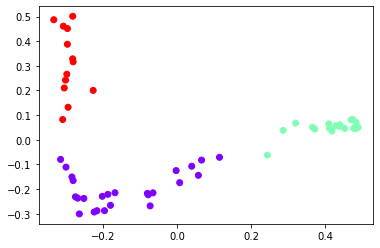

In [73]:
plt.scatter(pca_msft[:,0], pca_msft[:,1], c=kmeans_msft.labels_, cmap='rainbow')
# plt.scatter(lsa_msft[:,0], lsa_msft[:,1], c=kmeans_msft.labels_, cmap='rainbow')

In [74]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(pca_msft)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(pca_msft, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

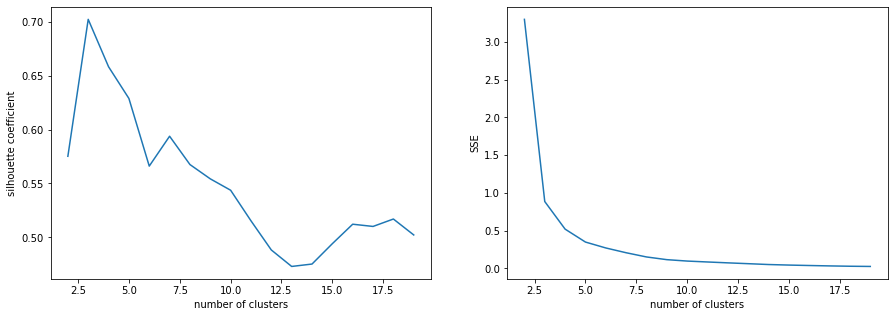

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

## Bigrams

### Create Document-Term Matrices

In [76]:
msft_earnings_dict_bi_cleaned = pickle.load(open('cleaned_corpus_bi.pickle', 'rb'))

In [77]:
msft_earnings_dict_bi_ordered = {}

for tscript in sorted(msft_earnings_dict_bi_cleaned):
    msft_earnings_dict_bi_ordered[tscript] = msft_earnings_dict_bi_cleaned[tscript]

In [78]:
ballmer_bi_dict = dict(list(msft_earnings_dict_bi_ordered.items())[:len(msft_earnings_dict_bi_ordered)//2]) 
nadella_bi_dict = dict(list(msft_earnings_dict_bi_ordered.items())[len(msft_earnings_dict_bi_ordered)//2:]) 

In [79]:
corpus_msft_bi = list(msft_earnings_dict_bi_ordered.values())
corpus_ballmer_bi = list(ballmer_bi_dict.values())
corpus_nadella_bi = list(nadella_bi_dict.values())

In [80]:
import pickle

with open('cleaned_corpus_bi_msft.pickle', 'wb') as f_bi_msft:
    pickle.dump(corpus_msft_bi, f_bi_msft)

with open('cleaned_corpus_bi_ball.pickle', 'wb') as f_bi_ball:
    pickle.dump(corpus_ballmer_bi, f_bi_ball)

with open('cleaned_corpus_bi_nad.pickle', 'wb') as f_bi_nad:
    pickle.dump(corpus_nadella_bi, f_bi_nad)

#### Count vectorizer

In [81]:
cv_msft_bi = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.5)
X_msft_bi = cv_msft_bi.fit_transform(corpus_msft_bi).toarray()

cv_ballmer_bi = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.7)
X_ballmer_bi = cv_ballmer_bi.fit_transform(corpus_ballmer_bi).toarray()

cv_nadella_bi = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.7)
X_nadella_bi = cv_nadella_bi.fit_transform(corpus_nadella_bi).toarray()

In [82]:
df_msft_bi = pd.DataFrame(X_msft_bi, columns=cv_msft_bi.get_feature_names())
df_ballmer_bi = pd.DataFrame(X_ballmer_bi, columns=cv_ballmer_bi.get_feature_names())
df_nadella_bi = pd.DataFrame(X_nadella_bi, columns=cv_nadella_bi.get_feature_names())

In [83]:
# Total bigram corpus

In [84]:
sum_words_msft_bi = X_msft_bi.sum(axis=0)
words_freq_msft_bi = [(word, sum_words_msft_bi[idx]) for word, idx in cv_msft_bi.vocabulary_.items()]
words_freq_msft_bi = sorted(words_freq_msft_bi, key = lambda x:x[1], reverse=True)

In [85]:
words_freq_msft_bi

[('intelligent cloud', 138),
 ('office commercial', 135),
 ('online service', 125),
 ('entertainment device', 96),
 ('productivity business', 92),
 ('margin dollar', 83),
 ('start see', 80),
 ('cloud enterprise', 79),
 ('premium mix', 78),
 ('manager cloud', 77),
 ('enterprise finance', 77),
 ('xbox one', 74),
 ('device division', 72),
 ('public cloud', 70),
 ('division amy', 70),
 ('hardware market', 64),
 ('value proposition', 64),
 ('commercial booking', 63),
 ('billion increase', 62),
 ('director thank', 62),
 ('price point', 60),
 ('thill ubs', 60),
 ('product cloud', 60),
 ('monthly active', 60),
 ('transactional business', 59),
 ('unit growth', 58),
 ('multiyear licensing', 58),
 ('year comparable', 58),
 ('installed base', 58),
 ('window phone', 58),
 ('let start', 57),
 ('dynamic crm', 56),
 ('raimo lenschow', 56),
 ('deutsche bank', 55),
 ('lenschow barclays', 55),
 ('calendar year', 54),
 ('surface pro', 54),
 ('attach rate', 53),
 ('online advertising', 53),
 ('service busi

In [86]:
# Ballmer bigram corpus

In [87]:
sum_words_ballmer_bi = X_ballmer_bi.sum(axis=0)
words_freq_ballmer_bi = [(word, sum_words_ballmer_bi[idx]) for word, idx in cv_ballmer_bi.vocabulary_.items()]
words_freq_ballmer_bi = sorted(words_freq_ballmer_bi, key = lambda x:x[1], reverse=True)

In [88]:
words_freq_ballmer_bi

[('research division', 258),
 ('inc research', 69),
 ('llc research', 68),
 ('second half', 66),
 ('premium mix', 62),
 ('gross margin', 59),
 ('multiyear licensing', 58),
 ('start see', 52),
 ('window phone', 52),
 ('revenue decline', 49),
 ('unit growth', 48),
 ('attach rate', 48),
 ('calendar year', 48),
 ('pc shipment', 47),
 ('service business', 46),
 ('thanks chris', 44),
 ('client revenue', 44),
 ('window vista', 43),
 ('holt morgan', 43),
 ('weve see', 43),
 ('window azure', 43),
 ('year ago', 42),
 ('feel good', 41),
 ('grow billion', 40),
 ('mature market', 40),
 ('pc unit', 40),
 ('transactional revenue', 40),
 ('financial result', 39),
 ('thanks bill', 39),
 ('multiyear license', 39),
 ('question operator', 38),
 ('holiday season', 38),
 ('come line', 38),
 ('price point', 38),
 ('sanford bernstein', 37),
 ('barnicle pacific', 37),
 ('pacific crest', 37),
 ('cloud service', 37),
 ('launch window', 36),
 ('business model', 36),
 ('growth quarter', 35),
 ('window live', 35),


In [89]:
# Nadella bigram corpus

In [90]:
sum_words_nadella_bi = X_nadella_bi.sum(axis=0)
words_freq_nadella_bi = [(word, sum_words_nadella_bi[idx]) for word, idx in cv_nadella_bi.vocabulary_.items()]
words_freq_nadella_bi = sorted(words_freq_nadella_bi, key = lambda x:x[1], reverse=True)

In [91]:
words_freq_nadella_bi

[('cloud enterprise', 59),
 ('manager cloud', 57),
 ('enterprise finance', 57),
 ('year comparable', 54),
 ('xbox one', 52),
 ('end support', 50),
 ('digital transformation', 50),
 ('enterprise customer', 49),
 ('window commercial', 47),
 ('power platform', 47),
 ('premium service', 46),
 ('surface pro', 45),
 ('billion increase', 45),
 ('decline constant', 44),
 ('public cloud', 43),
 ('azure gross', 43),
 ('business model', 42),
 ('business application', 42),
 ('game pas', 42),
 ('margin improvement', 41),
 ('operating income', 41),
 ('value proposition', 40),
 ('ahead expectation', 40),
 ('cloud business', 39),
 ('transactional business', 39),
 ('way think', 38),
 ('income increase', 38),
 ('booking growth', 37),
 ('approximately point', 37),
 ('increase point', 37),
 ('run rate', 36),
 ('long term', 36),
 ('growth continue', 36),
 ('wondering could', 35),
 ('seat growth', 35),
 ('iaa paas', 35),
 ('health care', 35),
 ('ex tac', 35),
 ('sale mix', 35),
 ('sale market', 34),
 ('incr

#### Tf-idf vectorizer

In [92]:
cv_tfidf_msft_bi = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.5)
X_tfidf_msft_bi = cv_tfidf_msft_bi.fit_transform(corpus_msft_bi).toarray()

cv_tfidf_ballmer_bi = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.7 )
X_tfidf_ballmer_bi = cv_tfidf_ballmer_bi.fit_transform(corpus_ballmer_bi).toarray()

cv_tfidf_nadella_bi = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=2, max_df=0.7)
X_tfidf_nadella_bi = cv_tfidf_nadella_bi.fit_transform(corpus_nadella_bi).toarray()

In [93]:
df_tfidf_msft_bi = pd.DataFrame(X_tfidf_msft_bi, columns=cv_tfidf_msft_bi.get_feature_names())
df_tfidf_ballmer_bi = pd.DataFrame(X_tfidf_ballmer_bi, columns=cv_tfidf_ballmer_bi.get_feature_names())
df_tfidf_nadella_bi = pd.DataFrame(X_tfidf_nadella_bi, columns=cv_tfidf_nadella_bi.get_feature_names())

In [94]:
indices = np.argsort(cv_tfidf_msft_bi.idf_)[::-1]
features = cv_tfidf_msft_bi.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['zukin piper', 'interest window', 'inventory drive', 'inventory change', 'inventory buildup', 'inventory balance', 'inventory attach', 'introduce window', 'introduce team', 'introduce surface']


In [95]:
indices = np.argsort(cv_tfidf_ballmer_bi.idf_)[::-1]
features = cv_tfidf_ballmer_bi.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['mark one', 'per console', 'excite capability', 'excite advance', 'people internally', 'people invest', 'people like', 'people love', 'exchange revenue', 'people move']


In [96]:
indices = np.argsort(cv_tfidf_nadella_bi.idf_)[::-1]
features = cv_tfidf_nadella_bi.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['zukin piper', 'increasingly get', 'increasingly even', 'increasingly drive', 'increasingly digital', 'increasingly data', 'increased commitment', 'increase year', 'increase xbox', 'increase would']


### Topic Modeling

#### Non-negative matrix factorization (NMF), Count vectorizer

In [97]:
X_msft_bi.shape

(56, 25787)

In [98]:
X_ballmer_bi.shape

(28, 11351)

In [99]:
X_nadella_bi.shape

(28, 14131)

In [100]:
# Total bigram corpus

In [101]:
nmf_msft_bi = NMF(2)
doc_topic_nmf_msft_bi = nmf_msft_bi.fit_transform(X_msft_bi)
doc_topic_nmf_msft_bi.shape

(56, 2)

In [102]:
topic_word_nmf_msft_bi = nmf_msft_bi.components_
topic_word_nmf_msft_bi.shape

(2, 25787)

In [103]:
words_msft_bi = cv_msft_bi.get_feature_names()
t_nmf_msft_bi = topic_word_nmf_msft_bi.argsort(axis=1)[:,-1:-11:-1]
top_topic_words_nmf_msft_bi = [[words_msft_bi[i] for i in topic] for topic in t_nmf_msft_bi]
top_topic_words_nmf_msft_bi

[['intelligent cloud',
  'office commercial',
  'productivity business',
  'margin dollar',
  'commercial booking',
  'monthly active',
  'product cloud',
  'cloud enterprise',
  'division amy',
  'director thank'],
 ['online service',
  'entertainment device',
  'premium mix',
  'device division',
  'hardware market',
  'unit growth',
  'window vista',
  'attach rate',
  'start see',
  'service business']]

In [104]:
doc_topic_nmf_msft_bi.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
# Ballmer bigram corpus

In [106]:
nmf_ballmer_bi = NMF(2)
doc_topic_nmf_ballmer_bi = nmf_ballmer_bi.fit_transform(X_ballmer_bi)
doc_topic_nmf_ballmer_bi.shape

(28, 2)

In [107]:
topic_word_nmf_ballmer_bi = nmf_ballmer_bi.components_
topic_word_nmf_ballmer_bi.shape

(2, 11351)

In [108]:
words_ballmer_bi = cv_ballmer_bi.get_feature_names()
t_nmf_ballmer_bi = topic_word_nmf_ballmer_bi.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_ballmer_bi = [[words_ballmer_bi[i] for i in topic] for topic in t_nmf_ballmer_bi]
top_topic_words_nmf_ballmer_bi

[['research division',
  'llc research',
  'inc research',
  'gross margin',
  'multiyear licensing',
  'window phone'],
 ['second half',
  'premium mix',
  'window vista',
  'unit growth',
  'client revenue',
  'service business']]

In [109]:
doc_topic_nmf_ballmer_bi.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [110]:
# Nadella bigram corpus

In [111]:
nmf_nadella_bi = NMF(2)
doc_topic_nmf_nadella_bi = nmf_nadella_bi.fit_transform(X_nadella_bi)
doc_topic_nmf_nadella_bi.shape

(28, 2)

In [112]:
topic_word_nmf_nadella_bi = nmf_nadella_bi.components_
topic_word_nmf_nadella_bi.shape

(2, 14131)

In [113]:
words_nadella_bi = cv_nadella_bi.get_feature_names()
t_nmf_nadella_bi = topic_word_nmf_nadella_bi.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_nmf_nadella_bi = [[words_nadella_bi[i] for i in topic] for topic in t_nmf_nadella_bi]
top_topic_words_nmf_nadella_bi

[['cloud enterprise',
  'manager cloud',
  'enterprise finance',
  'xbox one',
  'enterprise customer',
  'surface pro'],
 ['year comparable',
  'power platform',
  'billion increase',
  'ahead expectation',
  'game pas',
  'end support']]

In [114]:
doc_topic_nmf_nadella_bi.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Latent Dirichlet Allocation (LDA) - Count vectorizer

In [115]:
# Total bigram corpus

In [116]:
lda_msft_bi = LatentDirichletAllocation(n_components=2)
doc_topic_lda_msft_bi = lda_msft_bi.fit_transform(X_msft_bi)
doc_topic_lda_msft_bi.shape

(56, 2)

In [117]:
topic_word_lda_msft_bi = lda_msft_bi.components_
topic_word_lda_msft_bi.shape

(2, 25787)

In [118]:
t_lda_msft_bi = topic_word_lda_msft_bi.argsort(axis=1)[:,-1:-11:-1]
top_topic_words_lda_msft_bi = [[words_msft_bi[i] for i in topic] for topic in t_lda_msft_bi]
top_topic_words_lda_msft_bi

[['intelligent cloud',
  'office commercial',
  'productivity business',
  'cloud enterprise',
  'manager cloud',
  'enterprise finance',
  'xbox one',
  'margin dollar',
  'division amy',
  'public cloud'],
 ['online service',
  'entertainment device',
  'premium mix',
  'device division',
  'hardware market',
  'unit growth',
  'calendar year',
  'start see',
  'attach rate',
  'service business']]

In [119]:
doc_topic_lda_msft_bi.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [120]:
# Ballmer bigram corpus

In [121]:
lda_ballmer_bi = LatentDirichletAllocation(n_components=2)
doc_topic_lda_ballmer_bi = lda_ballmer_bi.fit_transform(X_ballmer_bi)
doc_topic_lda_ballmer_bi.shape

(28, 2)

In [122]:
topic_word_lda_ballmer_bi = lda_ballmer_bi.components_
topic_word_lda_ballmer_bi.shape

(2, 11351)

In [123]:
t_lda_ballmer_bi = topic_word_lda_ballmer_bi.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_lda_ballmer_bi = [[words_ballmer_bi[i] for i in topic] for topic in t_lda_ballmer_bi]
top_topic_words_lda_ballmer_bi

[['second half',
  'window vista',
  'premium mix',
  'client revenue',
  'service business',
  'unit growth'],
 ['research division',
  'inc research',
  'llc research',
  'multiyear licensing',
  'window phone',
  'start see']]

In [124]:
doc_topic_lda_ballmer_bi.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])

In [125]:
# Nadella bigram corpus

In [126]:
lda_nadella_bi = LatentDirichletAllocation(n_components=2)
doc_topic_lda_nadella_bi = lda_nadella_bi.fit_transform(X_nadella_bi)
doc_topic_lda_nadella_bi.shape

(28, 2)

In [127]:
topic_word_lda_nadella_bi = lda_nadella_bi.components_
topic_word_lda_nadella_bi.shape

(2, 14131)

In [128]:
t_lda_nadella_bi = topic_word_lda_nadella_bi.argsort(axis=1)[:,-1:-7:-1]
top_topic_words_lda_nadella_bi = [[words_nadella_bi[i] for i in topic] for topic in t_lda_nadella_bi]
top_topic_words_lda_nadella_bi

[['manager cloud',
  'enterprise finance',
  'cloud enterprise',
  'enterprise customer',
  'surface pro',
  'xbox one'],
 ['year comparable',
  'power platform',
  'billion increase',
  'game pas',
  'window commercial',
  'ahead expectation']]

In [129]:
doc_topic_lda_nadella_bi.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Non-negative matrix factorization (NMF), Tf-idf vectorizer

In [130]:
X_tfidf_msft_bi.shape

(56, 25787)

In [131]:
# Total bigram corpus

In [132]:
nmf_tfidf_msft_bi = NMF(2)
doc_topic_nmf_tfidf_msft_bi = nmf_tfidf_msft_bi.fit_transform(X_tfidf_msft_bi)
doc_topic_nmf_tfidf_msft_bi.shape

(56, 2)

In [133]:
topic_word_nmf_tfidf_msft_bi = nmf_tfidf_msft_bi.components_
topic_word_nmf_tfidf_msft_bi.shape

(2, 25787)

In [134]:
words_tfidf_msft_bi = cv_tfidf_msft_bi.get_feature_names()
t_nmf_tfidf_msft_bi = topic_word_nmf_tfidf_msft_bi.argsort(axis=1)[:,-1:-11:-1]
top_topic_words_nmf_tfidf_msft_bi = [[words_tfidf_msft_bi[i] for i in topic] for topic in t_nmf_tfidf_msft_bi]
top_topic_words_nmf_tfidf_msft_bi

[['intelligent cloud',
  'office commercial',
  'productivity business',
  'margin dollar',
  'power platform',
  'digital transformation',
  'monthly active',
  'commercial booking',
  'enterprise finance',
  'manager cloud'],
 ['online service',
  'entertainment device',
  'multiyear licensing',
  'device division',
  'window phone',
  'hardware market',
  'window vista',
  'multiyear license',
  'pc shipment',
  'premium mix']]

In [135]:
doc_topic_nmf_tfidf_msft_bi.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Clustering

In [136]:
# Total bigram corpus

In [137]:
pca = PCA(n_components=2)

X_tfidf_msft_centered_bi = X_tfidf_msft_bi - X_tfidf_msft_bi.mean(axis=0)
pca_msft_bi = pca.fit_transform(X_tfidf_msft_centered_bi)

In [138]:
kmeans_msft_bi = KMeans(n_clusters = 2)
kmeans_msft_bi.fit(pca_msft_bi)

KMeans(n_clusters=2)

In [139]:
kmeans_msft_bi.cluster_centers_

array([[ 0.22882689,  0.00324051],
       [-0.22882689, -0.00324051]])

In [140]:
kmeans_msft_bi.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

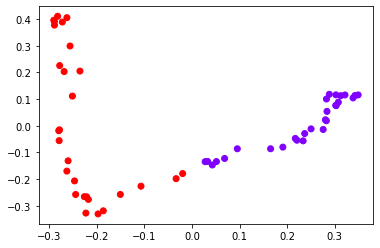

In [141]:
plt.scatter(pca_msft_bi[:,0], pca_msft_bi[:,1], c=kmeans_msft_bi.labels_, cmap='rainbow')

In [142]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(pca_msft_bi)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(pca_msft_bi, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

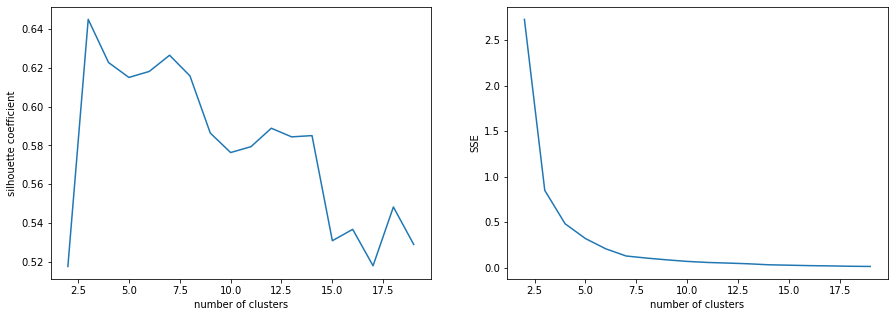

In [143]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');